<h1>Parameter Tuning of Support Vector Machine for Blood Donation Classification


<h1>1. INTRODUCTION

Support vector machines (SVMs) are one of the most widely used supervised machine
learning methods for classification task. SVMs are able to handle binary classification
problems applying the kernel tricks [1,2] and this study is done with the use of SVM
to classify the blood donor for the blood transfusion service center.

<h2>1.1 Statement of the problem

Blood banks' supply of blood is vital and closely related to the healthcare system. Blood banks will be able to
make appropriate plans if they can identify regular blood donors [3]. Performance of
SVM can be significantly affected by the choice of hyperparameters such as data split
ratio and kernel[4,6]. However, determining the optimal values for these poses a challenge
due to their interdependencies and computational constraints. Also the data imbalance is another challenge in healthcare data Therefore, performing data augumentation to clear balance data and experiments
with different split ratio and kernel method must be put into practice for improved
classification of data.

<h2>1.2 Project objectives

The main objectives are :

*   To evaluate the effectiveness of different kernel functions (Poly, Linear, and RBF) in classifying blood donation data using SVM, with a focus on both imbalanced and balanced datasets.
*   To address the impact of data imbalance on model performance by applying data augmentation techniques and evaluating their effect on SVM classification accuracy, recall, and F1-score.
*   To compare the classification performance of SVM across multiple data split ratios (70:30 and 80:20) for both balanced and imbalanced datasets, using metrics such as accuracy, recall, and F1-score to determine the optimal approach for blood donation classification.





In [1]:
#importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>2. METHODOLOGY

<h2>2.1 Data Source

The data source is from UC Irvine Machine Learning Repository which holds the
database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. In total 748
records each one included Recency - months since last donation, Frequency - total
number of donations, Monetary - total blood donated in c.c., Time - months since first
donation and a binary variable representing whether he/she donated blood in March
2007 (1 stand for donating blood; 0 stands for not donating blood) [7,9].


In [ ]:
#loading dataset
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [3]:
#fetching data
blood_transfusion_service_center = fetch_ucirepo(id=176)

In [4]:
x = blood_transfusion_service_center.data.features
y = blood_transfusion_service_center.data.targets

In [5]:
blood_df = pd.concat([x, y], axis=1)
blood_df.shape
blood_df.head()
blood_df['Donated_Blood'].value_counts()

,count
Donated_Blood,
0,570
1,178


In [6]:
donated_df = blood_df[blood_df['Donated_Blood']==1]
donated_df.shape

(178, 5)

In [7]:
not_donated_df = blood_df[blood_df['Donated_Blood']==0]
not_donated_df.shape

(570, 5)

In [8]:
donated_df.head()

,Recency,Frequency,Monetary,Time,Donated_Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
6,2,7,1750,14,1


In [9]:
not_donated_df.head()

,Recency,Frequency,Monetary,Time,Donated_Blood
4,1,24,6000,77,0
5,4,4,1000,4,0
7,1,12,3000,35,0
10,4,23,5750,58,0
11,0,3,750,4,0


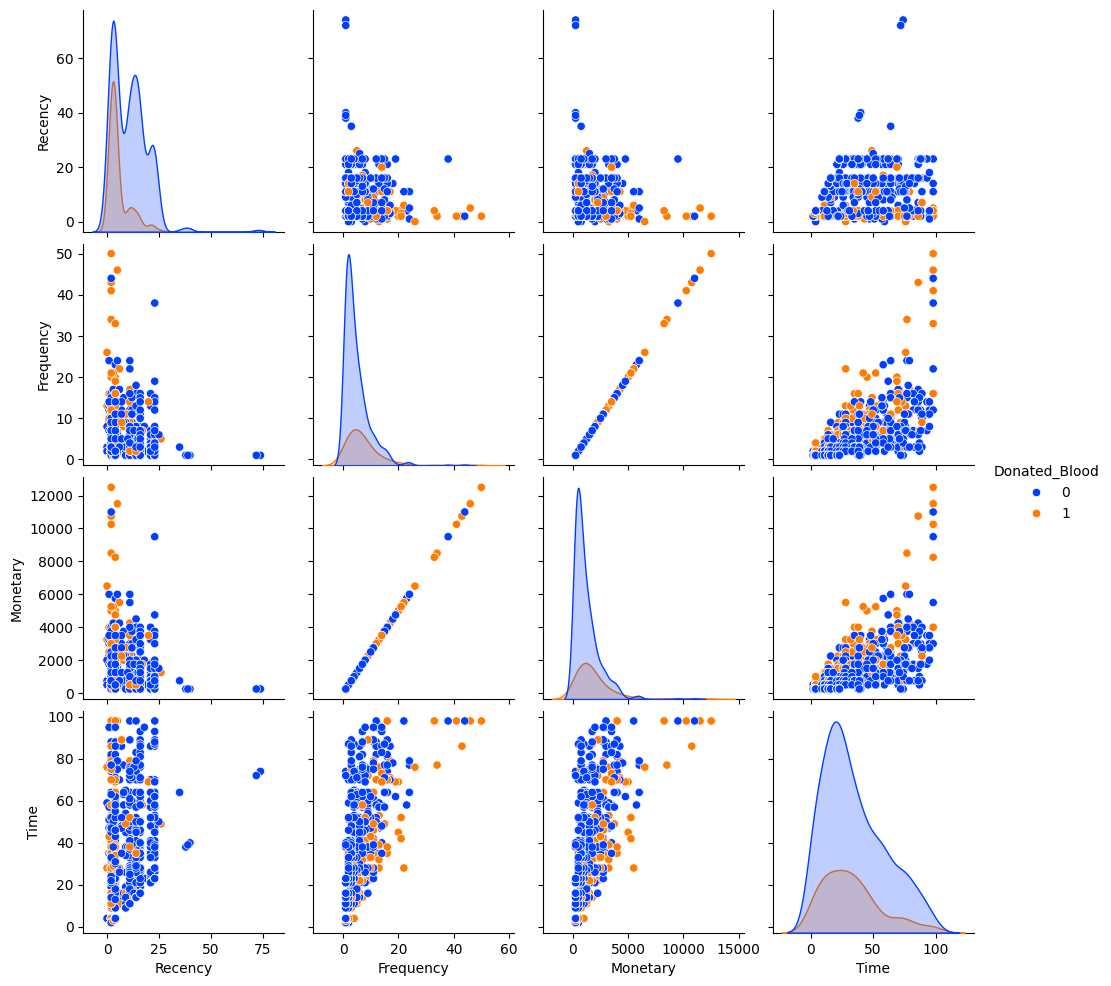

In [ ]:
sns.pairplot(blood_df, hue='Donated_Blood', palette="bright")

In [10]:
blood_df.dtypes

,0
Recency,int64
Frequency,int64
Monetary,int64
Time,int64
Donated_Blood,int64


In [11]:
blood_df.columns

Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Donated_Blood'], dtype='object')

In [12]:
feature_df = blood_df[['Recency', 'Frequency', 'Monetary', 'Time']]
x = np.asarray(feature_df)
y = np.asarray(blood_df['Donated_Blood'])
x[0:5]

array([[    2,    50, 12500,    98],
       [    0,    13,  3250,    28],
       [    1,    16,  4000,    35],
       [    2,    20,  5000,    45],
       [    1,    24,  6000,    77]])

In [13]:
y[0:5]

array([1, 1, 1, 1, 0])

Text(0.5, 1.0, 'Data Distribution')

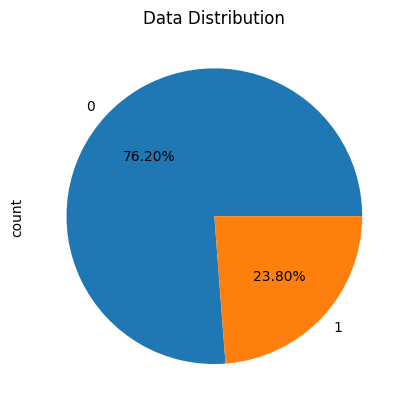

In [21]:
y_series = pd.Series(y)
ax = y_series.value_counts().plot.pie(autopct='%.2f%%')
ax.set_title("Data Distribution")

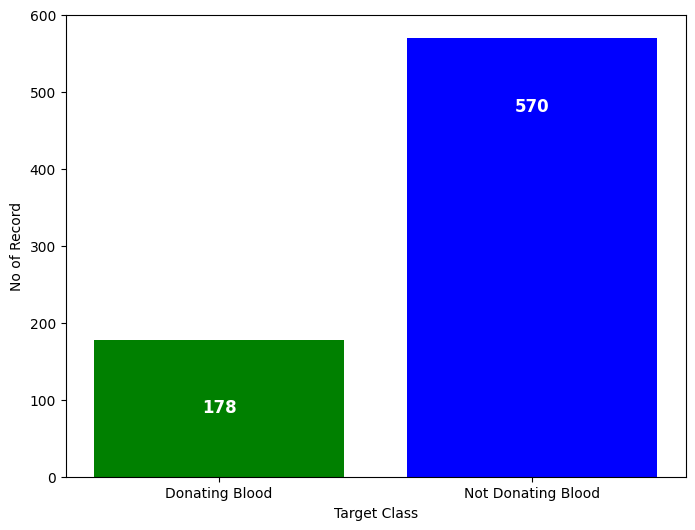

In [25]:
import matplotlib.pyplot as plt

# Data
labels = ['Donating Blood', 'Not Donating Blood']
counts = [178, 570]
colors = ['green', 'blue']

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=colors)

# Add labels on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 100,
             f'{count}', ha='center', va='bottom', color='white', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel('Target Class')
plt.ylabel('No of Record')
plt.ylim(0, 600)  # Set y-axis limit for better visualization
plt.show()

<h2>2.2 Experiment with 70:30 Split Ratio

In [ ]:
#traning and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=6)

In [ ]:
x_test.shape

(225, 4)

In [ ]:
y_test.shape

(225,)

In [ ]:
c=10

#Poly Kernel

In [ ]:
#modeling
from sklearn import svm
#classifier = svm.SVC(kernel='rbf', gamma='auto', C=45)
classifier = svm.SVC(kernel='poly', degree = 4, C=c)
#classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)
y_predict =classifier.predict(x_test)

In [ ]:
y_predict.shape

(225,)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       165
           1       1.00      0.03      0.06        60

    accuracy                           0.74       225
   macro avg       0.87      0.52      0.46       225
weighted avg       0.81      0.74      0.64       225



True Positive (TP): 2
False Positive (FP): 0
False Negative (FN): 58
True Negative (TN): 165


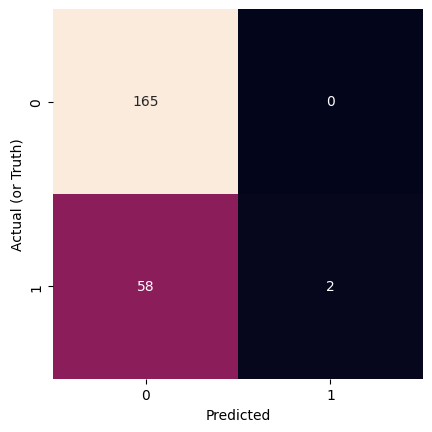

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_predict)
ax=sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,)

#Change labels on x and y axes
#ax.set_xticklabels(['0', '1'])
#ax.set_yticklabels(['0', '1'], rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual (or Truth)')

tn, fp, fn, tp = mat.ravel()
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")

#Linear Kernel

In [ ]:
#modeling
from sklearn import svm
#classifier = svm.SVC(kernel='rbf', gamma='auto', C=45)
#classifier = svm.SVC(kernel='poly', degree = 4)
classifier = svm.SVC(kernel='linear', C=c)
classifier.fit(x_train, y_train)
y_predict =classifier.predict(x_test)

In [ ]:
y_predict.shape

(225,)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85       165
           1       0.00      0.00      0.00        60

    accuracy                           0.73       225
   macro avg       0.37      0.50      0.42       225
weighted avg       0.54      0.73      0.62       225



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


True Positive (TP): 0
False Positive (FP): 0
False Negative (FN): 60
True Negative (TN): 165


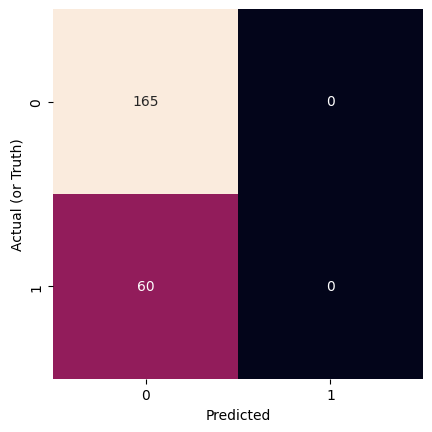

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_predict)
ax=sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,)

#Change labels on x and y axes
#ax.set_xticklabels(['0', '1'])
#ax.set_yticklabels(['0', '1'], rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual (or Truth)')

tn, fp, fn, tp = mat.ravel()
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")

#RBF Kernel

In [ ]:
#modeling
from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma='auto', C=c)
#classifier = svm.SVC(kernel='poly', degree = 4)
#classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)
y_predict =classifier.predict(x_test)

In [ ]:
y_predict.shape

(225,)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       165
           1       0.30      0.12      0.17        60

    accuracy                           0.69       225
   macro avg       0.52      0.51      0.49       225
weighted avg       0.62      0.69      0.64       225



True Positive (TP): 7
False Positive (FP): 16
False Negative (FN): 53
True Negative (TN): 149


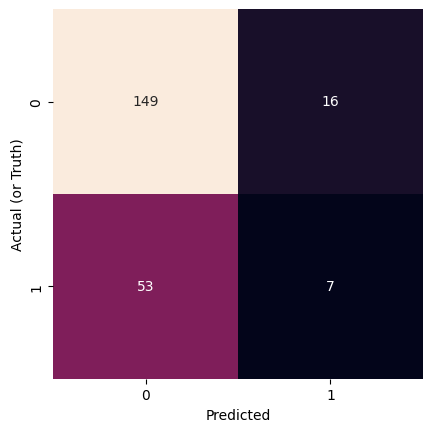

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_predict)
ax=sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,)

#Change labels on x and y axes
#ax.set_xticklabels(['0', '1'])
#ax.set_yticklabels(['0', '1'], rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual (or Truth)')

tn, fp, fn, tp = mat.ravel()
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")

<h3>2.2.1 Result analysis with imbalance dataset and 70:30 split ratio

 The dataset's imbalance made it challenging to accurately classify donors the minority class. Recall, an important measure of the model's ability to identify donors, was very low. It reached only 0.03 with the polynomial kernel, dropped to 0.00 with the linear kernel, and improved slightly to 0.12 with the RBF kernel. This indicates that all kernels struggled to detect donors, although the RBF kernel performed a little better.

The F1-Score, which balances precision and recall, followed a similar trend. It was 0.00 for the linear kernel, 0.06 for the polynomial kernel, and 0.17 for the RBF kernel. These results highlight that none of the kernels performed well in identifying the minority class.

#Experiment for 80:20 Split Ratio

In [ ]:
#traning and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=6)

In [ ]:
x_test.shape

(150, 4)

In [ ]:
y_test.shape

(150,)

In [ ]:
c=10

#Poly Kernel

In [ ]:
#modeling
from sklearn import svm
#classifier = svm.SVC(kernel='rbf', gamma='auto', C=45)
classifier = svm.SVC(kernel='poly', degree = 4, C=c)
#classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)
y_predict =classifier.predict(x_test)

In [ ]:
y_predict.shape

(150,)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       111
           1       1.00      0.05      0.10        39

    accuracy                           0.75       150
   macro avg       0.88      0.53      0.48       150
weighted avg       0.81      0.75      0.66       150



True Positive (TP): 2
False Positive (FP): 0
False Negative (FN): 37
True Negative (TN): 111


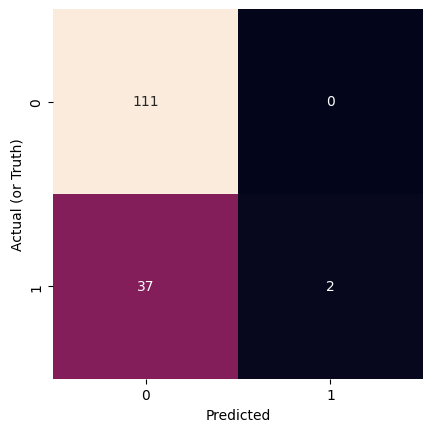

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_predict)
ax=sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,)

#Change labels on x and y axes
#ax.set_xticklabels(['0', '1'])
#ax.set_yticklabels(['0', '1'], rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual (or Truth)')

tn, fp, fn, tp = mat.ravel()
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")

#Linear Kernel

In [ ]:
#modeling
from sklearn import svm
#classifier = svm.SVC(kernel='rbf', gamma='auto', C=45)
#classifier = svm.SVC(kernel='poly', degree = 4)
classifier = svm.SVC(kernel='linear', C=c)
classifier.fit(x_train, y_train)
y_predict =classifier.predict(x_test)

In [ ]:
y_predict.shape

(150,)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       111
           1       0.00      0.00      0.00        39

    accuracy                           0.74       150
   macro avg       0.37      0.50      0.43       150
weighted avg       0.55      0.74      0.63       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


True Positive (TP): 0
False Positive (FP): 0
False Negative (FN): 39
True Negative (TN): 111


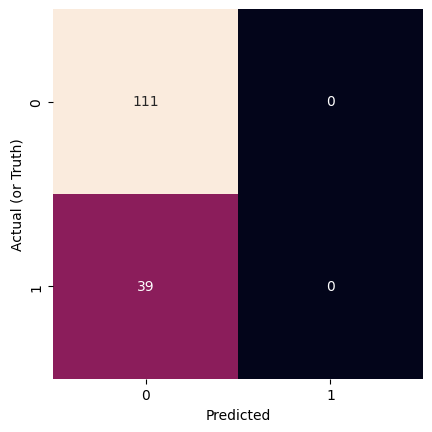

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_predict)
ax=sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,)

#Change labels on x and y axes
#ax.set_xticklabels(['0', '1'])
#ax.set_yticklabels(['0', '1'], rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual (or Truth)')

tn, fp, fn, tp = mat.ravel()
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")

#RBF Kernel

In [ ]:
#modeling
from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma='auto', C=c)
#classifier = svm.SVC(kernel='poly', degree = 4)
#classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)
y_predict =classifier.predict(x_test)

In [ ]:
y_predict.shape

(150,)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       111
           1       0.29      0.10      0.15        39

    accuracy                           0.70       150
   macro avg       0.51      0.51      0.48       150
weighted avg       0.62      0.70      0.64       150



True Positive (TP): 4
False Positive (FP): 10
False Negative (FN): 35
True Negative (TN): 101


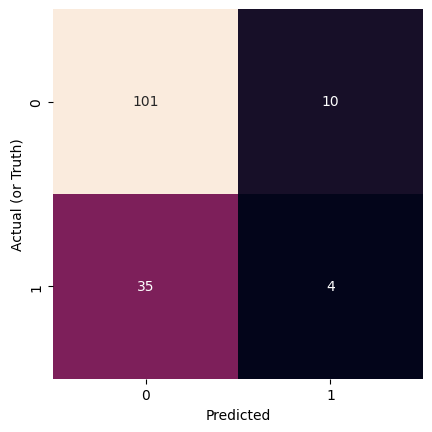

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_predict)
ax=sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,)

#Change labels on x and y axes
#ax.set_xticklabels(['0', '1'])
#ax.set_yticklabels(['0', '1'], rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual (or Truth)')

tn, fp, fn, tp = mat.ravel()
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")

<h3>2.2.2 Result analysis with imbalanced dataset and 80:20 split ratio

The polynomial kernel with a recall of 0.05. Its F1-Score was 0.10, showing poor performance because it couldn't balance precision and recall effectively.The linear kernel completely failed to detect any donors, with both recall and F1-Score at 0.00. This shows it couldn't handle the minority class in this setup.The RBF kernel performed slightly better, with a recall of 0.10 and an F1-Score of 0.15.

Overall, the RBF kernel performed better than the polynomial and linear kernels, but all struggled to classify donors in this imbalanced dataset.

This poor performance emphasizes the need for techniques like data balancing or augmentation to improve recall and F1-Score, especially for donor classification.

# Random Oversampling


Text(0.5, 1.0, 'Over-Sampling')

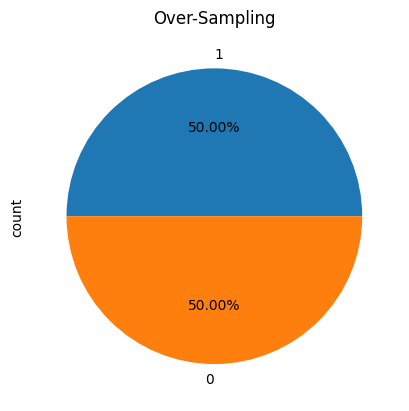

In [23]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="not majority")

X_res, y_res = ros.fit_resample(x, y)

y_res_series = pd.Series(y_res)

ax = y_res_series.value_counts().plot.pie(autopct='%.2f%%')
ax.set_title("Over-Sampling")


In [ ]:

X_res_df = pd.DataFrame(X_res)
oversample_blood_df = pd.concat([X_res_df, y_res_series.rename("Donated_Blood")], axis=1)

print(oversample_blood_df.shape)

oversample_blood_df.head(5)

(1140, 5)


,0,1,2,3,Donated_Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
headers = {0 : "Recency",
1 : "Frequency",
2 : "Monetary",
3 : "Time",
}

In [ ]:
oversample_blood_df = oversample_blood_df.rename(columns = headers)



In [ ]:
oversample_blood_df.head(5)

,Recency,Frequency,Monetary,Time,Donated_Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
oversample_blood_df['Donated_Blood'].value_counts()

,count
Donated_Blood,
1,570
0,570


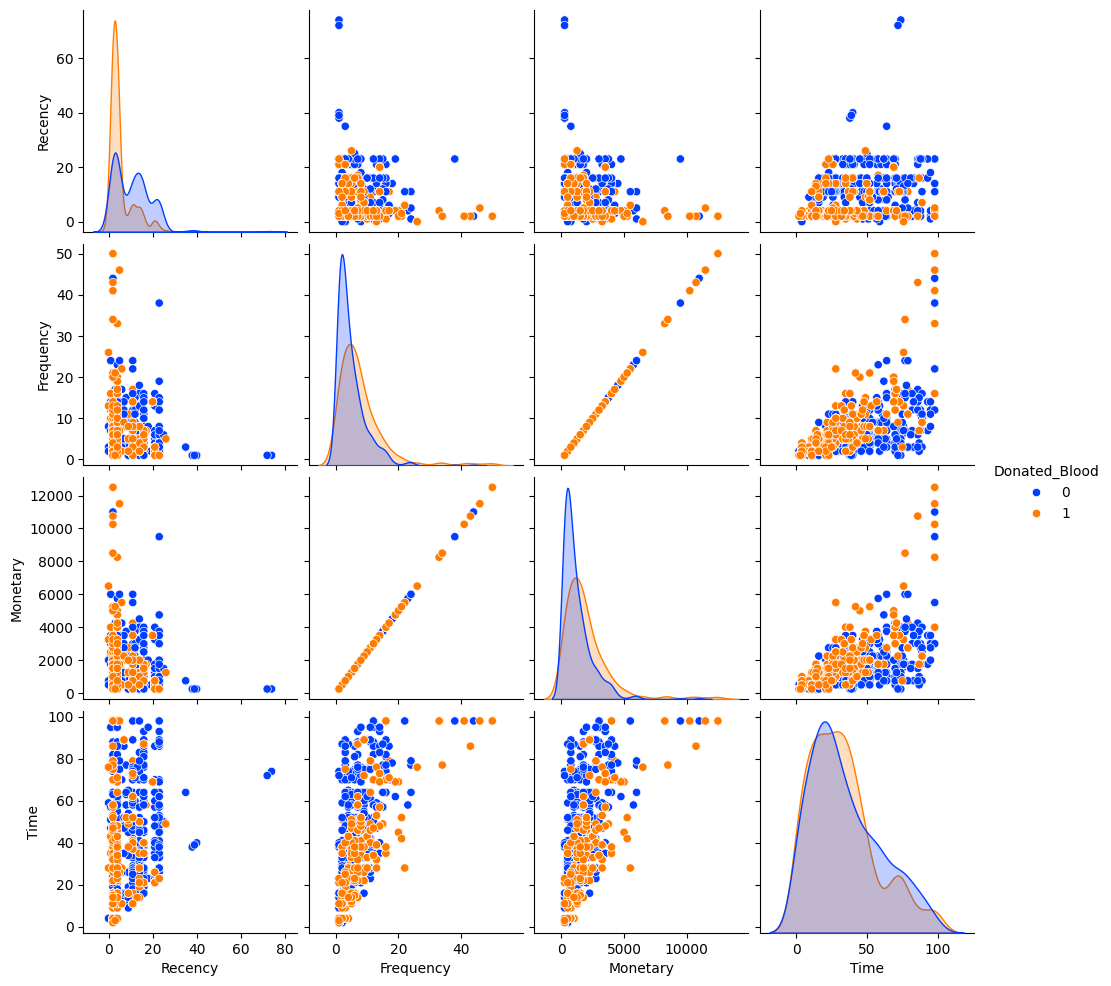

In [ ]:
sns.pairplot(oversample_blood_df, hue='Donated_Blood', palette="bright")

In [ ]:
oversample_blood_df.columns

Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Donated_Blood'], dtype='object')

In [ ]:
OSfeature_df = oversample_blood_df[['Recency', 'Frequency', 'Monetary', 'Time']]
X_OS = np.asarray(OSfeature_df)
y_OS = np.asarray(oversample_blood_df['Donated_Blood'])

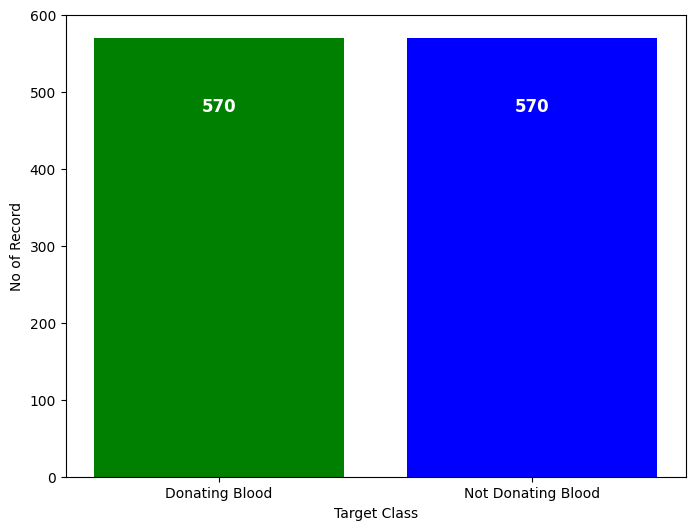

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['Donating Blood', 'Not Donating Blood']
counts = [570, 570]
colors = ['green', 'blue']

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=colors)

# Add labels on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 100,
             f'{count}', ha='center', va='bottom', color='white', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel('Target Class')
plt.ylabel('No of Record')
plt.ylim(0, 600)  # Set y-axis limit for better visualization
plt.show()

#Experiment for 70:30 Split Ratio : Balance Condition

In [ ]:
#traning and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_OS,y_OS,test_size=0.3, random_state=6)

In [ ]:
x_test.shape

(342, 4)

In [ ]:
y_test.shape

(342,)

#Poly Kernel

In [ ]:
#modeling
from sklearn import svm
#classifier = svm.SVC(kernel='rbf', gamma='auto', C=45)
classifier = svm.SVC(kernel='poly', degree = 4, C=c)
#classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)
y_predict =classifier.predict(x_test)

In [ ]:
y_predict.shape

(342,)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       187
           1       0.45      1.00      0.62       155

    accuracy                           0.46       342
   macro avg       0.73      0.50      0.32       342
weighted avg       0.75      0.46      0.29       342



True Positive (TP): 155
False Positive (FP): 186
False Negative (FN): 0
True Negative (TN): 1


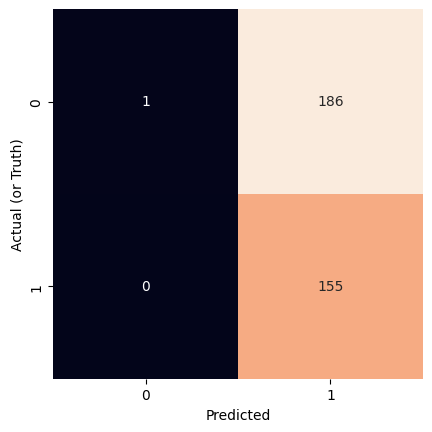

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_predict)
ax=sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,)

#Change labels on x and y axes
#ax.set_xticklabels(['0', '1'])
#ax.set_yticklabels(['0', '1'], rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual (or Truth)')

tn, fp, fn, tp = mat.ravel()
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")

#Linear Kernel

In [ ]:
#modeling
from sklearn import svm
#classifier = svm.SVC(kernel='rbf', gamma='auto', C=45)
#classifier = svm.SVC(kernel='poly', degree = 4)
classifier = svm.SVC(kernel='linear', C=c)
classifier.fit(x_train, y_train)
y_predict =classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.73      0.52      0.61       187
           1       0.57      0.76      0.65       155

    accuracy                           0.63       342
   macro avg       0.65      0.64      0.63       342
weighted avg       0.66      0.63      0.63       342



True Positive (TP): 118
False Positive (FP): 89
False Negative (FN): 37
True Negative (TN): 98


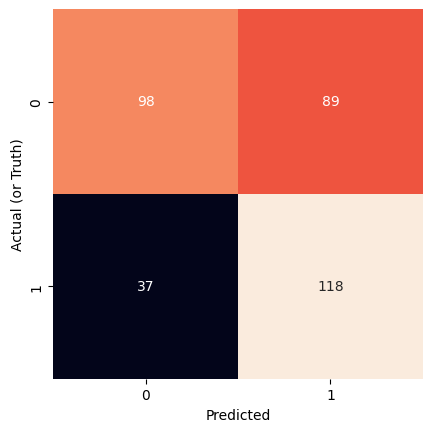

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_predict)
ax=sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,)

#Change labels on x and y axes
#ax.set_xticklabels(['0', '1'])
#ax.set_yticklabels(['0', '1'], rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual (or Truth)')

tn, fp, fn, tp = mat.ravel()
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")


#RBF Kernel

In [ ]:
#modeling
from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma='auto', C=c)
#classifier = svm.SVC(kernel='poly', degree = 4)
#classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)
y_predict =classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82       187
           1       0.76      0.87      0.81       155

    accuracy                           0.82       342
   macro avg       0.82      0.82      0.82       342
weighted avg       0.83      0.82      0.82       342



True Positive (TP): 135
False Positive (FP): 42
False Negative (FN): 20
True Negative (TN): 145


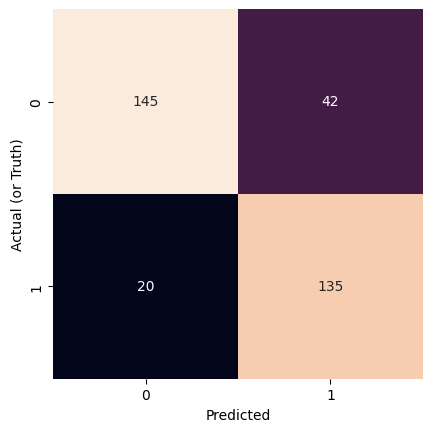

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_predict)
ax=sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,)

#Change labels on x and y axes
#ax.set_xticklabels(['0', '1'])
#ax.set_yticklabels(['0', '1'], rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual (or Truth)')

tn, fp, fn, tp = mat.ravel()
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")

<h3> 2.2.3 Result analysis with balance dataset with random oversampling and 70:30 split ratio

The polynomial kernel perfectly identified all donors (positive class) with a recall of 1.00 but struggled with the non-donors (negative class), achieving a recall of just 0.01. This led to an F1-Score of 0.01 for donors and 0.62 for non-donors, showing poor overall performance.The linear kernel performed more evenly, with a recall of 0.76 for donors and 0.52 for non-donors. The F1-Scores were 0.65 for donors and 0.61 for non-donors, indicating a better balance between precision and recall than the polynomial kernel. The overall accuracy of 0.63 suggests moderate performance on a balanced dataset.The RBF kernel outperformed the others, achieving a recall of 0.87 for donors and 0.78 for non-donors. Its F1-Scores were 0.81 for donors and 0.82 for non-donors, showing a strong balance between precision and recall. The RBF kernel also had the highest overall accuracy of 0.82, making it the most effective model for this scenario.

These results highlight the importance of balancing the dataset through oversampling, which significantly improved the model's classification ability across both classes.


#Experiment for 80:20 Split Ratio : Balance Condition

In [ ]:
#traning and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_OS,y_OS,test_size=0.2, random_state=6)

In [ ]:
x_test.shape

(228, 4)

In [ ]:
y_test.shape

(228,)

#Poly Kernel

In [ ]:
#modeling
from sklearn import svm
#classifier = svm.SVC(kernel='rbf', gamma='auto', C=45)
classifier = svm.SVC(kernel='poly', degree = 4, C=c)
#classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)
y_predict =classifier.predict(x_test)

In [ ]:
y_predict.shape

(228,)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.54      0.96      0.69       119
           1       0.72      0.12      0.20       109

    accuracy                           0.56       228
   macro avg       0.63      0.54      0.45       228
weighted avg       0.63      0.56      0.46       228



True Positive (TP): 13
False Positive (FP): 5
False Negative (FN): 96
True Negative (TN): 114


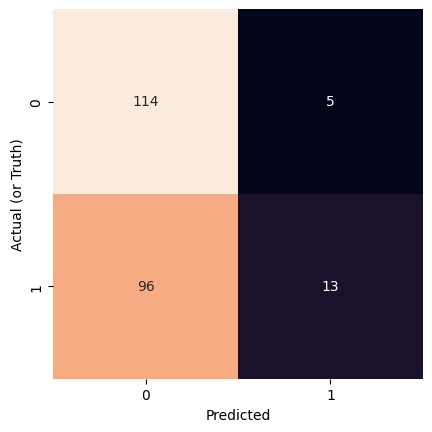

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_predict)
ax=sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,)

#Change labels on x and y axes
#ax.set_xticklabels(['0', '1'])
#ax.set_yticklabels(['0', '1'], rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual (or Truth)')

tn, fp, fn, tp = mat.ravel()
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")

#Linear Kernel

In [ ]:
#modeling
from sklearn import svm
#classifier = svm.SVC(kernel='rbf', gamma='auto', C=45)
#classifier = svm.SVC(kernel='poly', degree = 4)
classifier = svm.SVC(kernel='linear', C=c)
classifier.fit(x_train, y_train)
y_predict =classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.54      0.62       119
           1       0.61      0.80      0.69       109

    accuracy                           0.66       228
   macro avg       0.68      0.67      0.66       228
weighted avg       0.68      0.66      0.66       228



True Positive (TP): 87
False Positive (FP): 55
False Negative (FN): 22
True Negative (TN): 64


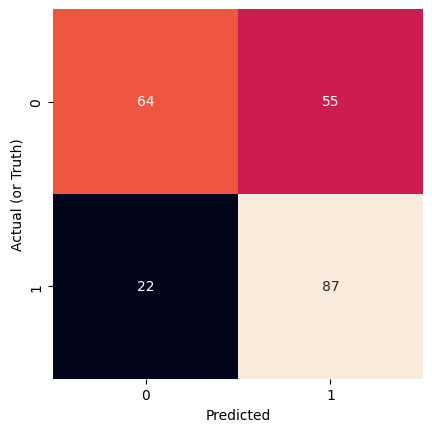

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_predict)
ax=sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,)

#Change labels on x and y axes
#ax.set_xticklabels(['0', '1'])
#ax.set_yticklabels(['0', '1'], rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual (or Truth)')

tn, fp, fn, tp = mat.ravel()
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")


#RBF Kernel

In [ ]:
#modeling
from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma='auto', C=c)
#classifier = svm.SVC(kernel='poly', degree = 4)
#classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)
y_predict =classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       119
           1       0.83      0.80      0.81       109

    accuracy                           0.82       228
   macro avg       0.82      0.82      0.82       228
weighted avg       0.82      0.82      0.82       228



True Positive (TP): 87
False Positive (FP): 18
False Negative (FN): 22
True Negative (TN): 101


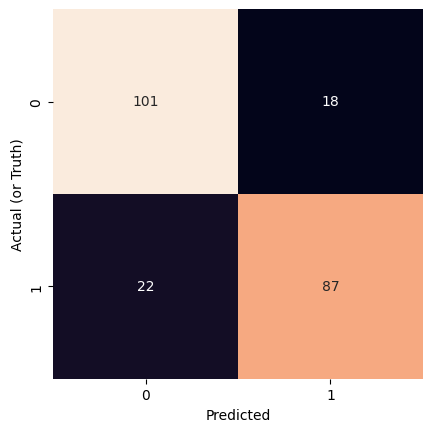

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_predict)
ax=sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,)

#Change labels on x and y axes
#ax.set_xticklabels(['0', '1'])
#ax.set_yticklabels(['0', '1'], rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual (or Truth)')

tn, fp, fn, tp = mat.ravel()
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")

<h3>2.2.4 Result analysis for balanced dataset with random oversampling and 80:20 split ratio

 The polynomial kernel showed a recall of 0.12 for the positive class, with F1-scores of 0.20 and an overall accuracy of 0.56. The linear kernel performed better, achieving a recall of 0.80 for the positive class and 0.54 for the negative class, with F1-scores of 0.69 and 0.62, and an overall accuracy of 0.66. The RBF kernel demonstrated the best overall performance, with recall values of 0.85 for the negative class and 0.80 for the positive class, balanced F1-scores of 0.83 and 0.81, and the highest overall accuracy of 0.82, indicating strong classification capabilities for both classes.

Using a balanced dataset with an 80:20 split, the SVM kernels performed differently. The polynomial kernel struggled with the positive class, identifying very few instances correctly and showing poor overall accuracy. The linear kernel did better, identifying more cases from both classes, but it still made several mistakes. The RBF kernel was the most effective, correctly identifying a large number of cases from both the positive and negative classes with the highest accuracy among the three. This makes the RBF kernel the best choice for a balanced dataset

<h2>3. DISCUSSION AND CONCLUSION

This project emphasized the importance of handling data imbalance and choosing the right kernel for SVM classification. In initial tests with an imbalanced dataset, the RBF kernel performed better than the polynomial and linear kernels in recall, F1-score, and accuracy, showing a stronger ability to identify the minority class. However, even with the RBF kernel, classifying blood donors was still challenging due to the imbalance. After applying random oversampling to balance the dataset, all kernels performed better, with the RBF kernel achieving the highest accuracy and F1-scores for both the 70:30 and 80:20 split ratios. The RBF kernel showed it could balance recall for both the positive and negative classes while maintaining good precision and overall accuracy. On the other hand, the polynomial kernel had difficulty with balanced datasets, especially in identifying donors, while the linear kernel showed some improvement but still didn’t surpass the RBF kernel.
Overall, the experiments showed that the RBF kernel is the best choice for blood donor classification, especially when the dataset is balanced. When **recall** is the most important metric, the **70:30** split slightly outperformed the 80:20 split for identifying donors, with scores of **0.87**, while both split ratios performed similarly in **F1-score** with **0.81** and **accuracy** with **0.82**.

<h2>4.FUTURE WORK

In future work, testing additional data augmentation methods, fine-tuning hyperparameters further, and exploring ensemble models to enhance performance can be done.

<h2> References


[1] R. I. Mukhamediev et al., “Review of Artificial Intelligence and Machine Learning
Technologies: Classification, Restrictions, Opportunities and Challenges,”
Mathematics, vol. 10, no. 15, Art. no. 15, Jan. 2022, doi: 10.3390/math10152552.

[2] W. Dudzik, J. Nalepa, and M. Kawulok, “Evolving data-adaptive support vector
machines for binary classification,” Knowl.-Based Syst., vol. 227, p. 107221, Sep.
2021, doi: 10.1016/j.knosys.2021.107221.

[3] Santhanam, “Application of CART Algorithm in Blood Donors Classification,” J.
Comput. Sci., vol. 6, no. 5, pp. 548–552, May 2010, doi:
10.3844/jcssp.2010.548.552.

[4] I. Shadeed, D. Abd, J. Alwan, and A. Rabash, “Performance Evaluation of Kernels
in Support Vector Machine,” Nov. 2018, pp. 96–101. doi:
10.1109/AiCIS.2018.00029.

[5] B. Yekkehkhany, A. Safari, S. Homayouni, and M. Hasanlou, “A COMPARISON
STUDY OF DIFFERENT KERNEL FUNCTIONS FOR SVM-BASED
CLASSIFICATION OF MULTI-TEMPORAL POLARIMETRY SAR DATA,”
Int. Arch. Photogramm. Remote Sens. Spat. Inf. Sci., vol. XL-2-W3, pp. 281–285,
Oct. 2014, doi: 10.5194/isprsarchives-XL-2-W3-281-2014.

[6] “On the Importance of Train–Test Split Ratio of Datasets in Automatic Landslide
Detection by Supervised Classification.” Accessed: Nov. 12, 2024. [Online].
Available: https://www.mdpi.com/2072-4292/12/18/3054

[7] I-Cheng Yeh, “Blood Transfusion Service Center.” UCI Machine Learning
Repository, 2008. doi: 10.24432/C5GS39.

[8] “Figure 3. General architecture of a support vector maching (SVM) model...,”
ResearchGate. Accessed: Nov. 12, 2024. [Online]. Available:
https://www.researchgate.net/figure/General-architecture-of-a-support-vectormaching-SVM-model-according-to-55_fig3_34874518

[9] https://www.healthline.com/health/how-often-can-you-donate-blood#frequency